In [262]:
#Importaciones
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

In [263]:
#I have a few warnings I don't want to clutter the markdown file with
warnings.simplefilter(action='ignore', category=FutureWarning)

#Next read in the dataset
demand_df = pd.read_csv("Historical Product Demand.csv")

#View the first 3 rows of the data, to see what it looks like
demand_df.head(3)
print()

# determine the statistical details of the numerical values
print(demand_df.describe())
print()
#What is the missing values in each of the columns
print(demand_df.isnull().sum())

#Remove null values from the date column
demand_df = demand_df[demand_df['Date'].notnull()]

# Find the minimum and maximum dates
min_date = demand_df['Date'].min()
max_date = demand_df['Date'].max()

print(f"The earliest date is: {min_date}")
print(f"The latest date is: {max_date}")


        Product_Code Warehouse Product_Category       Date Order_Demand
count        1048575   1048575          1048575    1037336      1048575
unique          2160         4               33       1729         3828
top     Product_1359    Whse_J     Category_019  2013/9/27        1000 
freq           16936    764447           481099       2075       112682

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
The earliest date is: 2011/1/8
The latest date is: 2017/1/9


In [264]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


El conjunto de datos contiene cinco columnas, todas de tipo objeto, y abarca más de un millón de registros. Aquí están los detalles de las columnas:

Product_Code: Código que identifica cada producto.
Warehouse: Almacén donde se encuentra el producto.
Product_Category: Categoría a la que pertenece el producto.
Date: Fecha en que se registró la demanda del producto.
Order_Demand: Demanda del producto en esa fecha, actualmente en formato de texto con espacios adicionales.
Hay algunas observaciones clave y pasos siguientes:

Convertir la columna 'Date' a tipo fecha: Actualmente es un objeto (string), y necesitamos convertirlo para manipular las fechas correctamente.
Limpiar y convertir 'Order_Demand' a números: Los datos tienen espacios y el tipo de dato es texto, lo que requiere limpieza para análisis numéricos.
Tratar los valores faltantes: Específicamente en la columna 'Date', donde hay algunas entradas faltantes.
Revisar y manejar valores atípicos o errores en los datos.

In [265]:
#Before we can begin visualizing, a few changes need to occur, like data types and groupings
#This will allow our visuals to populate quicker

#Make sure Order_demand is read in as a numeric datatype
print(demand_df['Order_Demand'].dtypes)

#Need to change the date to a date datatype from an object
demand_df['Date'] = pd.to_datetime(demand_df['Date'])
demand_df['Order_Demand'] = pd.to_numeric(demand_df['Order_Demand'], errors='coerce')

# Eliminar filas con valores nulos
demand_df.dropna(subset=['Date'], inplace=True)

object


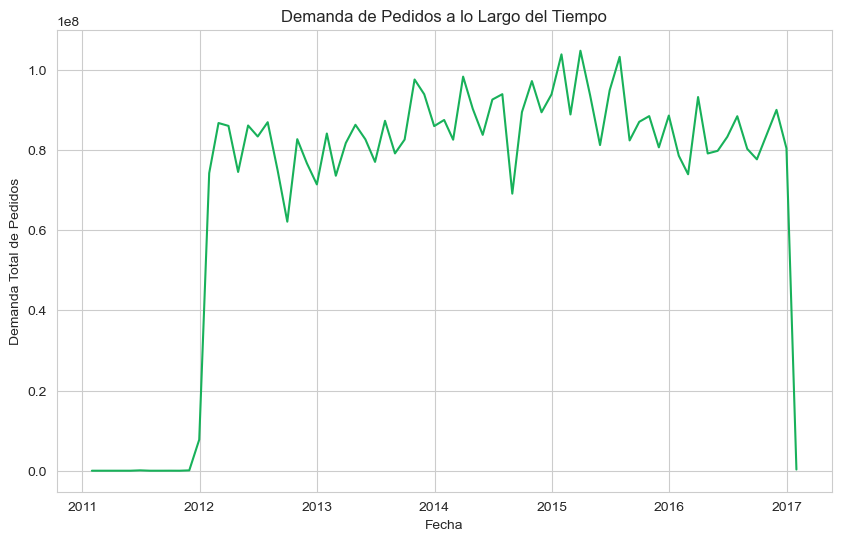

   Product_Code Warehouse Product_Category       Date  Order_Demand
0  Product_0993    Whse_J     Category_028 2012-07-27         100.0
1  Product_0979    Whse_J     Category_028 2012-01-19         500.0
2  Product_0979    Whse_J     Category_028 2012-02-03         500.0
3  Product_0979    Whse_J     Category_028 2012-02-09         500.0
4  Product_0979    Whse_J     Category_028 2012-03-02         500.0


C:\Users\jesus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


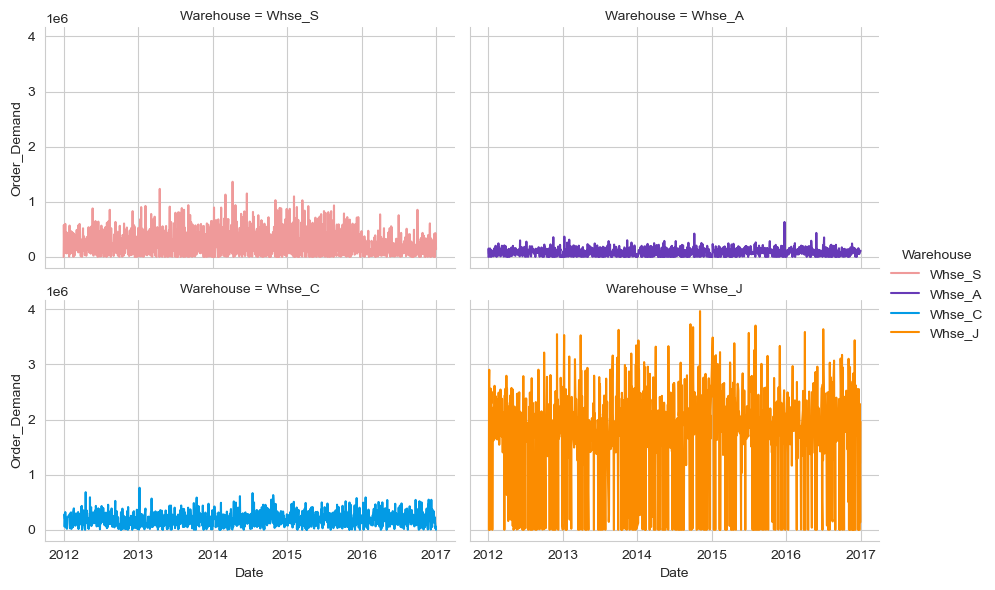

In [266]:
#Finalmente Agrupando
demand_df['Date'] = pd.to_datetime(demand_df['Date'])
demand_df_group = demand_df.groupby(pd.Grouper(key='Date', freq='M'))['Order_Demand'].sum().reset_index()

#Graficar el nuevo conjunto de datos
sns.set_style("whitegrid") #Establecer el estilo
plt.figure(figsize=(10, 6))
sns.lineplot(data=demand_df_group, x='Date', y='Order_Demand', color = '#18B15A')
plt.title('Demanda de Pedidos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Demanda Total de Pedidos')
plt.show()

#Ahora que vemos el gráfico general, notamos que cualquier fecha anterior a 2012 va a ser irrelevante. Podemos eliminar estos valores
print(demand_df.head())

#Ahora que vemos el gráfico general, notamos que cualquier fecha anterior a 2012 va a ser irrelevante. Podemos eliminar estos valores
demand_df = demand_df[demand_df['Date']>'2011-12-31']
#Tambien podemos ver que hay un valor atípico en 2012, que es mucho más alto que los demás. Podemos eliminar este valor atípico
demand_df = demand_df[demand_df['Order_Demand']<100000]
# Tambien podemos ver que los datos de 2017 son incompletos, por lo que podemos eliminar estos valores
demand_df = demand_df[demand_df['Date']<'2017-01-01']

#Veamos cómo se ve esto agrupado por almacén, para entender cuál de nuestros almacenes recibe más demanda
demand_df_group_warehouse = demand_df.groupby(['Date', 'Warehouse'])['Order_Demand'].sum().reset_index()

#Graficar esto ahora con facetas
#Descubrí que necesito usar sns.relplot, ya que lineplot no maneja bien las facetas
g = sns.relplot(data=demand_df_group_warehouse, 
                x='Date', 
                y='Order_Demand', 
                kind="line",
                hue='Warehouse',
                palette=["#EF9A9A", "#673AB7", "#039BE5", "#FB8C00"],
                col='Warehouse',  # Facetar por 'Warehouse'
                col_wrap=2,  
                height=3, aspect=1.5)
plt.show()

In [267]:
#Ahora que hemos limpiado los datos, podemos comenzar a analizarlos
#Primero, veamos cuántos productos únicos hay en el conjunto de datos
unique_products = demand_df['Product_Code'].nunique()
print(f'Hay {unique_products} productos únicos en el conjunto de datos')


Hay 2160 productos únicos en el conjunto de datos


In [268]:
#Ahora, veamos cuántas categorías únicas hay en el conjunto de datos
demand_df['Product_Category'].value_counts()


Product_Category
Category_019    461172
Category_005    101176
Category_001     97120
Category_007     81117
Category_021     51297
Category_006     34647
Category_028     30686
Category_011     23073
Category_015     22606
Category_024     20536
Category_009     19383
Category_026     14678
Category_030     12940
Category_032      9248
Category_022      8526
Category_023      7834
Category_018      5190
Category_003      4168
Category_013      3676
Category_020      3415
Category_031      2247
Category_033      1756
Category_008      1546
Category_012      1120
Category_010       948
Category_029       645
Category_017       603
Category_004       322
Category_002        76
Category_016        37
Category_025        35
Category_014        26
Category_027        22
Name: count, dtype: int64

In [269]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021871 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1021871 non-null  object        
 1   Warehouse         1021871 non-null  object        
 2   Product_Category  1021871 non-null  object        
 3   Date              1021871 non-null  datetime64[ns]
 4   Order_Demand      1021871 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.8+ MB


In [270]:
demand_df['storage'] = 0 

In [271]:
NaN = demand_df.isna().sum()
display(NaN)

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
storage             0
dtype: int64

In [272]:
#Encontrar valores duplicados
display(demand_df.duplicated().sum())
demand_df.drop_duplicates(inplace=True)
display(demand_df.duplicated().sum())

112577

0

In [273]:
# 1. Reemplazar los nombres de las columnas
demand_df.columns = demand_df.columns.str.lower().str.replace(" ", "_")

# 2. Convertir los datos a los tipos necesarios
demand_df['date'] = pd.to_datetime(demand_df['date'])
demand_df['order_Demand'] = pd.to_numeric(demand_df['order_demand'], errors='coerce')


In [274]:
# 2. Convertir los datos a los tipos necesarios
demand_df['date'] = pd.to_datetime(demand_df['date'])
demand_df['order_Demand'] = pd.to_numeric(demand_df['order_demand'], errors='coerce')
# Crear nuevas columnas para la semana, el mes y el año
demand_df['week'] = demand_df['date'].dt.isocalendar().week
demand_df['month'] = demand_df['date'].dt.month
demand_df['year'] = demand_df['date'].dt.year

In [275]:
import pandas as pd

# Suponiendo que 'demand_df' es tu DataFrame original

# Función para convertir los nombres de las columnas a snake_case si son de tipo texto
def to_snake_case(name):
    # Reemplazar espacios y guiones con guiones bajos y convertir a minúsculas
    return name.replace(' ', '_').replace('-', '_').lower()

# Aplicar la función solo a las columnas de tipo texto
demand_df.columns = [to_snake_case(col) if demand_df[col].dtype == 'object' else col for col in demand_df.columns]


In [276]:
demand_df['warehouse'].unique()
demand_df['product_code'].value_counts()

product_code
Product_1359    9802
Product_1295    7133
Product_1378    6742
Product_1286    6150
Product_1382    5992
                ... 
Product_1698       2
Product_1703       1
Product_0465       1
Product_2099       1
Product_0853       1
Name: count, Length: 2160, dtype: int64

In [277]:
import pandas as pd

# Asumiendo que 'demand_df' es tu DataFrame original

# Convertir la columna 'Date' a datetime si aún no está convertida
demand_df['date'] = pd.to_datetime(demand_df['date'])

# Agrupar por 'Warehouse', 'Product_Code' y 'Date'
grouped_df = demand_df.groupby(['warehouse', 'product_code', 'date'])['order_demand'].sum().reset_index()

# Ahora 'grouped_df' contiene la demanda total agrupada por almacén, código de producto y fecha
print(grouped_df.info())
print()
print(grouped_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627829 entries, 0 to 627828
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   warehouse     627829 non-null  object        
 1   product_code  627829 non-null  object        
 2   date          627829 non-null  datetime64[ns]
 3   order_demand  627829 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 19.2+ MB
None

       warehouse  product_code       date  order_demand
0         Whse_A  Product_0001 2012-01-03        1000.0
1         Whse_A  Product_0001 2012-01-04         200.0
2         Whse_A  Product_0001 2012-01-09        2000.0
3         Whse_A  Product_0001 2012-01-10        3000.0
4         Whse_A  Product_0001 2012-01-30         200.0
...          ...           ...        ...           ...
627824    Whse_S  Product_2169 2015-12-16          22.0
627825    Whse_S  Product_2169 2015-12-29         400.0
62

In [278]:

# Asumiendo que 'demand_df' es tu DataFrame original

# Cambiar la columna 'date' a tipo datetime
demand_df['date'] = pd.to_datetime(demand_df['date'])

# Crear columnas para la semana, el mes y el año antes de agrupar
demand_df['week'] = demand_df['date'].dt.isocalendar().week
demand_df['month'] = demand_df['date'].dt.month
demand_df['year'] = demand_df['date'].dt.year

# Agrupar por 'warehouse', 'product_code', 'year', 'month', 'week', y 'date', y sumar la 'order_demand'
grouped_df = demand_df.groupby(['warehouse', 'product_code', 'year', 'month', 'week', 'date'])['order_demand'].sum().reset_index()

# Ordenar los resultados por 'date' dentro de cada 'warehouse'
grouped_df_sorted = grouped_df.sort_values(by=['warehouse', 'date'])

# Crear DataFrames individuales para cada almacén
df_whse_j = grouped_df_sorted[grouped_df_sorted['warehouse'] == 'Whse_J']
df_whse_s = grouped_df_sorted[grouped_df_sorted['warehouse'] == 'Whse_S']
df_whse_c = grouped_df_sorted[grouped_df_sorted['warehouse'] == 'Whse_C']
df_whse_a = grouped_df_sorted[grouped_df_sorted['warehouse'] == 'Whse_A']

# Ahora cada almacén tiene su propio DataFrame, ordenado por fecha y con columnas para 'year', 'month', 'week'


In [279]:
df_whse_j.head(40)

,warehouse,product_code,year,month,week,date,order_demand
315219,Whse_J,Product_1056,2012,1,1,2012-01-04,120.0
127771,Whse_J,Product_0001,2012,1,1,2012-01-05,100.0
129100,Whse_J,Product_0008,2012,1,1,2012-01-05,3000.0
129696,Whse_J,Product_0011,2012,1,1,2012-01-05,1200.0
130644,Whse_J,Product_0012,2012,1,1,2012-01-05,1000.0
132241,Whse_J,Product_0015,2012,1,1,2012-01-05,1000.0
132363,Whse_J,Product_0016,2012,1,1,2012-01-05,100.0
133482,Whse_J,Product_0017,2012,1,1,2012-01-05,200.0
134197,Whse_J,Product_0018,2012,1,1,2012-01-05,100.0
136012,Whse_J,Product_0020,2012,1,1,2012-01-05,1100.0


In [280]:
demand_df.head(30)

,product_code,warehouse,product_category,date,order_demand,storage,order_Demand,week,month,year
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,0,100.0,30,7,2012
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,0,500.0,3,1,2012
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,0,500.0,5,2,2012
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,0,500.0,6,2,2012
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,0,500.0,9,3,2012
5,Product_0979,Whse_J,Category_028,2012-04-19,500.0,0,500.0,16,4,2012
6,Product_0979,Whse_J,Category_028,2012-06-05,500.0,0,500.0,23,6,2012
7,Product_0979,Whse_J,Category_028,2012-06-27,500.0,0,500.0,26,6,2012
8,Product_0979,Whse_J,Category_028,2012-07-23,500.0,0,500.0,30,7,2012
9,Product_0979,Whse_J,Category_028,2012-08-29,500.0,0,500.0,35,8,2012


In [281]:
demand_df['year'].unique()

array([2012, 2013, 2014, 2015, 2016])

In [282]:
demand_df['month'].unique()

array([ 7,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12,  5])

In [283]:
# Exportar cada DataFrame a un archivo CSV
df_whse_j.to_csv('demand_whse_a.csv', index=False)
df_whse_s.to_csv('demand_whse_b.csv', index=False)
df_whse_c.to_csv('demand_whse_c.csv', index=False)
df_whse_a.to_csv('demand_whse_d.csv', index=False)
demand_df.to_csv('demand_limpio.csv', index=False)

In [295]:
df_whse_j.column()

AttributeError: 'DataFrame' object has no attribute 'column'

#Columna mu, columna de pi, mu n+1

In [285]:
print(demand_df_provedor['product_code'].nunique())

2160


In [286]:
# Crear la columna 'provedor' que es igual a 'product_code'
demand_df['provedor'] = 'Proveedor-' + demand_df['product_code']

# Ordenar el DataFrame por la columna 'provedor'
demand_df_provedor = demand_df.sort_values('provedor')
print(demand_df_provedor['provedor'].unique())
print(demand_df_provedor['provedor'].nunique())



['Proveedor-Product_0001' 'Proveedor-Product_0002'
 'Proveedor-Product_0003' ... 'Proveedor-Product_2170'
 'Proveedor-Product_2171' 'Proveedor-Product_2172']
2160


In [287]:
# Obtener la lista de proveedores únicos ordenados
unique_providers = demand_df['provedor'].drop_duplicates().sort_values().reset_index(drop=True)

# Encontrar los índices impares y pares según las reglas especificadas
odd_indices = [i for i in range(len(unique_providers)) if i % 2 == 1 and (i // 2) % 2 == 0]  # Cada segundo número impar
even_indices = [i for i in range(len(unique_providers)) if i % 2 == 0 and (i // 5) % 5 == 0]  # Cada quinto número par
# Combinar y eliminar duplicados
indices_to_remove = list(set(odd_indices + even_indices))
# Obtener los proveedores a eliminar
providers_to_remove = unique_providers.iloc[indices_to_remove]

# Filtrar el DataFrame para excluir proveedores seleccionados
filtered_demand_df = demand_df[~demand_df['provedor'].isin(providers_to_remove)]
# Verificar los proveedores que quedan
remaining_providers = filtered_demand_df['provedor'].unique()
print(f"Proveedores restantes: {len(remaining_providers)}")


Proveedores restantes: 1402


In [288]:
# Contar cuántos productos tiene cada proveedor
product_counts = demand_df['provedor'].value_counts()

# Proveedores a eliminar
providers_to_remove = unique_providers.iloc[indices_to_remove]

# DataFrame de productos de proveedores eliminados
products_to_reassign_df = demand_df[demand_df['provedor'].isin(providers_to_remove)]

# Proveedores restantes
remaining_providers = demand_df[~demand_df['provedor'].isin(providers_to_remove)]['provedor'].unique()


# Asignar aleatoriamente un nuevo proveedor a cada producto en el DataFrame de productos reasignados
products_to_reassign_df['provedor'] = np.random.choice(remaining_providers, size=len(products_to_reassign_df))

# DataFrame de productos de proveedores no eliminados
non_removed_products_df = demand_df[~demand_df['provedor'].isin(providers_to_remove)]

# Combinar los dos DataFrames
demand_provedor = pd.concat([non_removed_products_df, products_to_reassign_df])

# Verificar el resultado
print(demand_provedor['provedor'].value_counts())  # Esto mostrará cuántos productos tiene cada proveedor ahora


provedor
Proveedor-Product_1359    10026
Proveedor-Product_1295     7373
Proveedor-Product_1378     6938
Proveedor-Product_1286     6380
Proveedor-Product_1382     6237
                          ...  
Proveedor-Product_1915      200
Proveedor-Product_1019      199
Proveedor-Product_0360      198
Proveedor-Product_1322      193
Proveedor-Product_0465      188
Name: count, Length: 1402, dtype: int64


C:\Users\jesus\AppData\Local\Temp\ipykernel_14064\4184517562.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_to_reassign_df['provedor'] = np.random.choice(remaining_providers, size=len(products_to_reassign_df))


In [ ]:
demand_df[""]

In [289]:
demand_provedor.to_csv('demand_provedor.csv', index=False)

In [289]:
demand_df["storage"] = 0
    p_o = df[not df["order_demand"] == df["storage"]].index[-1]
    mu_b = df["mu"].iloc[-1]  # mu : n - 1

    mu = me(p_o, mu_b)  # mu : n
    mu_a = me(mu, mu_b)  # mu : n + 1

    p_n = df['storage'].iloc[-1]  # last storage count

    p_i = abs(p_n - mu - mu_a)  # sales forcasting

    # Create a new DataFrame with the calculated values
    df_forecast = DataFrame({'mu_n': [mu], 'mu_n+2': [mu_a], 'p_n': [p_n], 'p_i': [p_i]})

    # Concatenate the original DataFrame with the new DataFrame
    df = pd.concat([df, df_forecast], axis=1)
    df.to_csv(r'C:\Users\jesus\PycharmProjects\pythonProject\Pochtli\'demand_imputado.csv', index=False)

    return df

In [290]:
print(demand_df['provedor'].value_counts())

provedor
Proveedor-Product_1359    9802
Proveedor-Product_1295    7133
Proveedor-Product_1378    6742
Proveedor-Product_1286    6150
Proveedor-Product_1382    5992
                          ... 
Proveedor-Product_1698       2
Proveedor-Product_1703       1
Proveedor-Product_0465       1
Proveedor-Product_2099       1
Proveedor-Product_0853       1
Name: count, Length: 2160, dtype: int64


In [291]:
print(df_whse_c['product_code'].nunique())

244
